<a href="https://colab.research.google.com/github/A-varshith/NLP_LAB/blob/main/NLP_LAB5_2403A52024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
import spacy
import pandas as pd
import spacy
from collections import Counter
import seaborn as sns
from spacy.matcher import Matcher

In [4]:
df=pd.read_csv('/content/arxiv_data.csv')
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [6]:
nlp = spacy.load("en_core_web_sm")


In [8]:
# Select first 100 abstracts (you can increase later)
texts = df["summaries"].dropna().head(100).tolist()

In [9]:
docs = [nlp(text) for text in texts]



In [10]:
noun_phrases = []

for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

# Count most common noun phrases
noun_phrase_freq = Counter(noun_phrases)
top_noun_phrases = noun_phrase_freq.most_common(10)

top_noun_phrases


[('we', 265),
 ('which', 74),
 ('that', 73),
 ('it', 72),
 ('the-art', 42),
 ('this paper', 34),
 ('medical image segmentation', 25),
 ('our method', 25),
 ('this work', 24),
 ('image segmentation', 22)]

In [11]:
entities = []

for doc in docs:
    for ent in doc.ents:
        entities.append(ent.label_)

entity_freq = Counter(entities)
entity_freq


Counter({'DATE': 13,
         'GPE': 21,
         'CARDINAL': 132,
         'NORP': 15,
         'ORG': 247,
         'ORDINAL': 37,
         'WORK_OF_ART': 2,
         'PERSON': 31,
         'PERCENT': 19,
         'PRODUCT': 6,
         'MONEY': 4,
         'TIME': 2,
         'LOC': 1,
         'LAW': 1,
         'EVENT': 1,
         'FAC': 3})

In [12]:
matcher = Matcher(nlp.vocab)

pattern = [
    {"POS": "ADJ"},
    {"POS": "NOUN"}
]

matcher.add("TECH_TERM", [pattern])

matches = []

for doc in docs:
    found_matches = matcher(doc)
    for match_id, start, end in found_matches:
        matches.append(doc[start:end].text.lower())

Counter(matches).most_common(10)


[('medical image', 62),
 ('semantic segmentation', 29),
 ('deep learning', 18),
 ('contextual information', 12),
 ('unlabeled data', 11),
 ('semantic image', 11),
 ('neural networks', 10),
 ('medical images', 10),
 ('medical imaging', 9),
 ('experimental results', 9)]

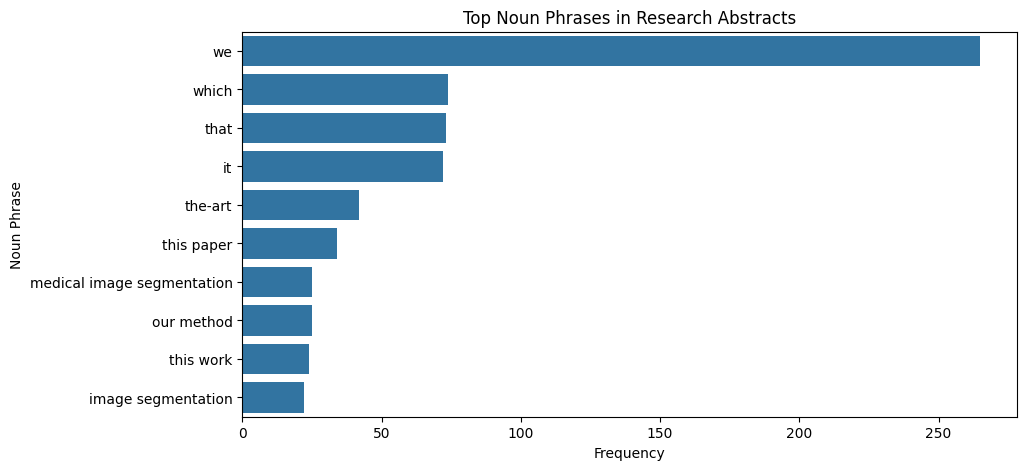

In [13]:
phrases, counts = zip(*top_noun_phrases)

plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(phrases))
plt.title("Top Noun Phrases in Research Abstracts")
plt.xlabel("Frequency")
plt.ylabel("Noun Phrase")
plt.show()


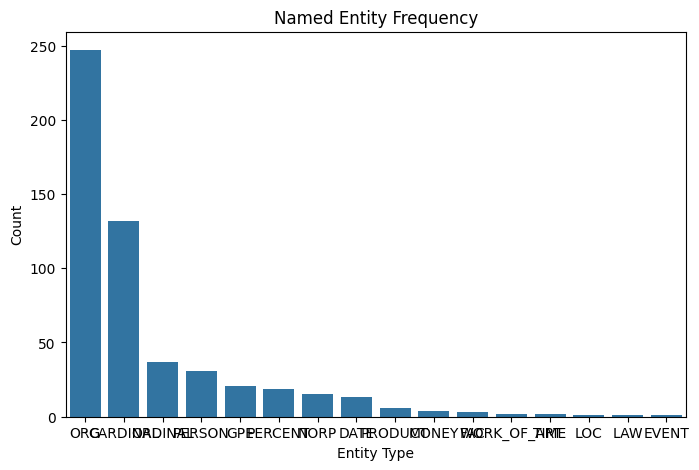

In [14]:
labels, values = zip(*entity_freq.most_common())

plt.figure(figsize=(8,5))
sns.barplot(x=list(labels), y=list(values))
plt.title("Named Entity Frequency")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.show()
